In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [235]:
df = pd.read_csv("dataset_.csv")
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,y_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
2,5.3,3.5,8.0,4.2,3.0,2.75,Low
3,5.1,3.9,9.2,1.2,4.6,2.67,Low
4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Study_Hours_Per_Day              2001 non-null   object
 1   Extracurricular_Hours_Per_Day    2001 non-null   object
 2   Sleep_Hours_Per_Day              2001 non-null   object
 3   Social_Hours_Per_Day             2001 non-null   object
 4   Physical_Activity_Hours_Per_Day  2001 non-null   object
 5   GPA                              2001 non-null   object
 6   Stress_Level                     2001 non-null   object
dtypes: object(7)
memory usage: 109.6+ KB


In [237]:
df.shape

(2001, 7)

In [238]:
df.isna().sum()

,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [239]:
df.duplicated().sum()

np.int64(0)

In [240]:
df.describe().T

,count,unique,top,freq
Study_Hours_Per_Day,2001,52,6.3,60
Extracurricular_Hours_Per_Day,2001,42,1.6,79
Sleep_Hours_Per_Day,2001,52,5.4,56
Social_Hours_Per_Day,2001,62,0.3,52
Physical_Activity_Hours_Per_Day,2001,119,4.3,41
GPA,2001,159,3.11,34
Stress_Level,2001,4,High,1029


In [241]:
for col in df.columns:
  print(df[col].value_counts())
  print('*'*200)

Study_Hours_Per_Day
6.3                60
6.7                53
7.4                52
9.7                51
5.3                50
8.2                48
7.3                47
8.8                47
6.0                46
8.6                45
9.0                45
9.1                45
7.1                45
9.5                44
6.1                44
6.6                43
5.5                42
8.3                42
5.9                42
6.4                42
5.8                42
9.6                41
7.2                41
8.9                40
6.8                40
8.1                39
6.9                39
8.0                38
5.4                37
7.5                37
5.2                37
7.6                37
6.2                36
7.7                36
8.5                36
8.7                36
9.8                36
7.0                35
7.9                35
9.4                34
7.8                34
8.4                33
9.3                33
5.7                32
5.1         

In [242]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print('*'*200)

Study_Hours_Per_Day
['y_Hours_Per_Day' '6.9' '5.3' '5.1' '6.5' '8.1' '6.0' '8.0' '8.4' '5.2'
 '7.7' '9.7' '6.4' '5.0' '8.9' '6.7' '8.6' '8.8' '7.6' '6.6' '7.1' '9.6'
 '9.0' '6.1' '6.8' '9.9' '6.2' '5.5' '8.2' '9.1' '8.3' '9.5' '7.9' '9.3'
 '9.4' '7.3' '5.8' '7.4' '5.9' '5.4' '8.7' '8.5' '5.6' '9.8' '10.0' '7.8'
 '6.3' '7.2' '5.7' '9.2' '7.0' '7.5']
********************************************************************************************************************************************************************************************************
Extracurricular_Hours_Per_Day
['Extracurricular_Hours_Per_Day' '3.8' '3.5' '3.9' '2.1' '0.6' '0.7' '1.8'
 '3.6' '1.1' '2.2' '3.3' '0.3' '2.6' '1.7' '2.0' '3.0' '3.2' '1.3' '0.1'
 '1.0' '2.9' '2.4' '0.9' '3.4' '1.5' '2.5' '3.7' '2.8' '1.2' '1.4' '0.5'
 '0.4' '2.3' '2.7' '3.1' '1.9' '4.0' '1.6' '0.0' '0.2' '0.8']
***************************************************************************************************************************************

In [243]:
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,y_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
2,5.3,3.5,8.0,4.2,3.0,2.75,Low
3,5.1,3.9,9.2,1.2,4.6,2.67,Low
4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate


In [244]:
print(df.columns)

Index(['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


In [245]:
df.drop(0, axis=0, inplace=True)

In [246]:
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
2,5.3,3.5,8.0,4.2,3.0,2.75,Low
3,5.1,3.9,9.2,1.2,4.6,2.67,Low
4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [247]:
df[['Study_Hours_Per_Day','GPA']].corr()

,Study_Hours_Per_Day,GPA
Study_Hours_Per_Day,1.000000,0.734468
GPA,0.734468,1.000000


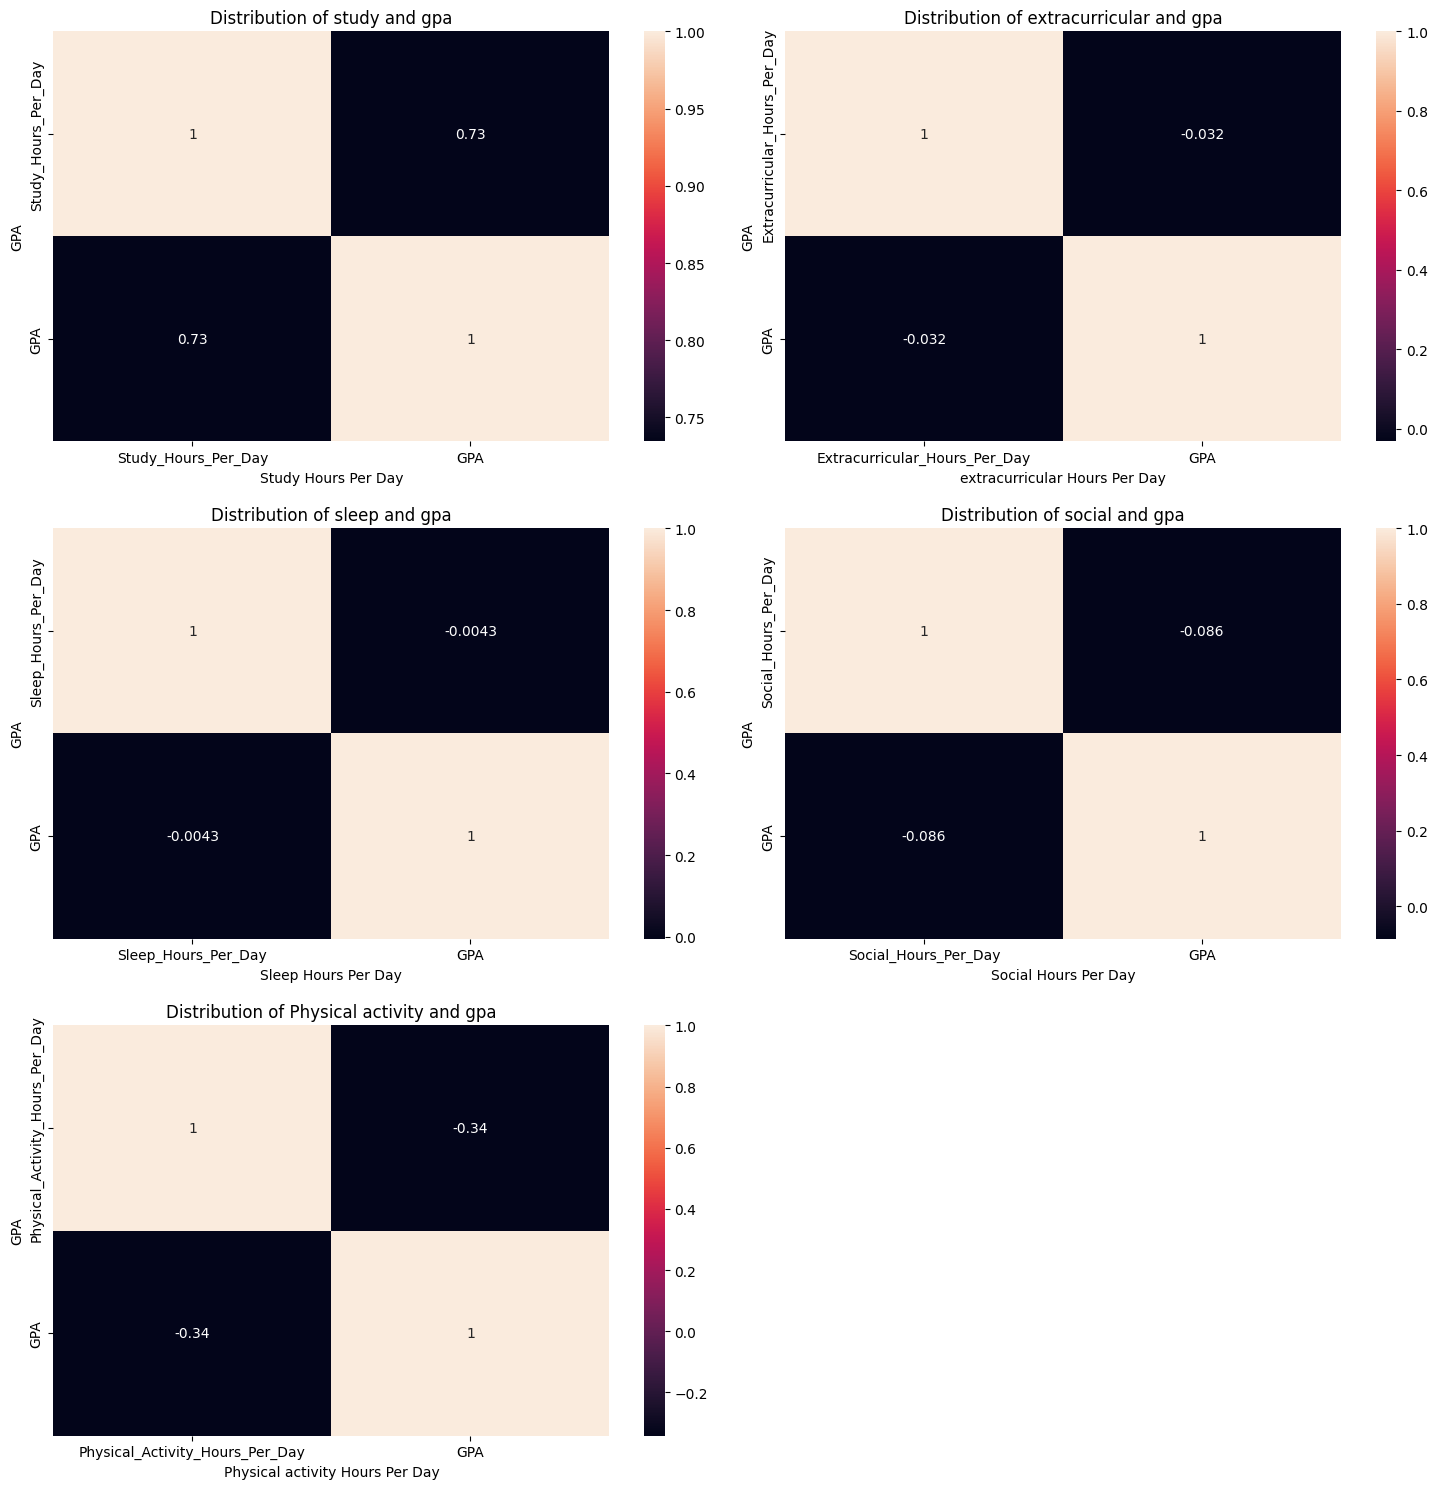

In [248]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes = axes.flatten()

sns.heatmap(df[['Study_Hours_Per_Day','GPA']].corr(), annot=True, ax=axes[0])
axes[0].set_title("Distribution of study and gpa")
axes[0].set_xlabel("Study Hours Per Day")
axes[0].set_ylabel("GPA")

sns.heatmap(df[['Extracurricular_Hours_Per_Day','GPA']].corr(), annot=True, ax=axes[1])
axes[1].set_title("Distribution of extracurricular and gpa")
axes[1].set_xlabel("extracurricular Hours Per Day")
axes[1].set_ylabel("GPA")

sns.heatmap(df[['Sleep_Hours_Per_Day','GPA']].corr(), annot=True, ax=axes[2])
axes[2].set_title("Distribution of sleep and gpa")
axes[2].set_xlabel("Sleep Hours Per Day")
axes[2].set_ylabel("GPA")

sns.heatmap(df[['Social_Hours_Per_Day','GPA']].corr(), annot=True, ax=axes[3])
axes[3].set_title("Distribution of social and gpa")
axes[3].set_xlabel("Social Hours Per Day")
axes[3].set_ylabel("GPA")

sns.heatmap(df[['Physical_Activity_Hours_Per_Day','GPA']].corr(), annot=True, ax=axes[4])
axes[4].set_title("Distribution of Physical activity and gpa")
axes[4].set_xlabel("Physical activity Hours Per Day")
axes[4].set_ylabel("GPA")

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

From the heatmaps, the correlation between GPA and the following variables is observed:

- **Study_Hours_Per_Day:** There appears to be a positive correlation between Study_Hours_Per_Day and GPA. This suggests that as the number of study hours per day increases, the GPA tends to increase as well.
- **Extracurricular_Hours_Per_Day:** The correlation between Extracurricular_Hours_Per_Day and GPA seems to be weak, potentially slightly negative or close to zero. This indicates that the amount of time spent on extracurricular activities has little to no significant linear relationship with GPA.
- **Sleep_Hours_Per_Day:** The correlation between Sleep_Hours_Per_Day and GPA is likely weak, possibly slightly positive or close to zero. This suggests that there isn't a strong linear relationship between sleep hours and GPA based on this data.
- **Social_Hours_Per_Day:** The correlation between Social_Hours_Per_Day and GPA appears to be negative. This implies that as the number of social hours per day increases, the GPA tends to decrease.
- **Physical_Activity_Hours_Per_Day:** The correlation between Physical_Activity_Hours_Per_Day and GPA seems to be weak, possibly slightly positive or close to zero. This suggests that the amount of time spent on physical activity has little to no significant linear relationship with GPA.

In summary, the strongest positive correlation with GPA is observed with Study_Hours_Per_Day, while Social_Hours_Per_Day shows a negative correlation. The other factors (Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, and Physical_Activity_Hours_Per_Day) appear to have weak or negligible linear relationships with GPA.

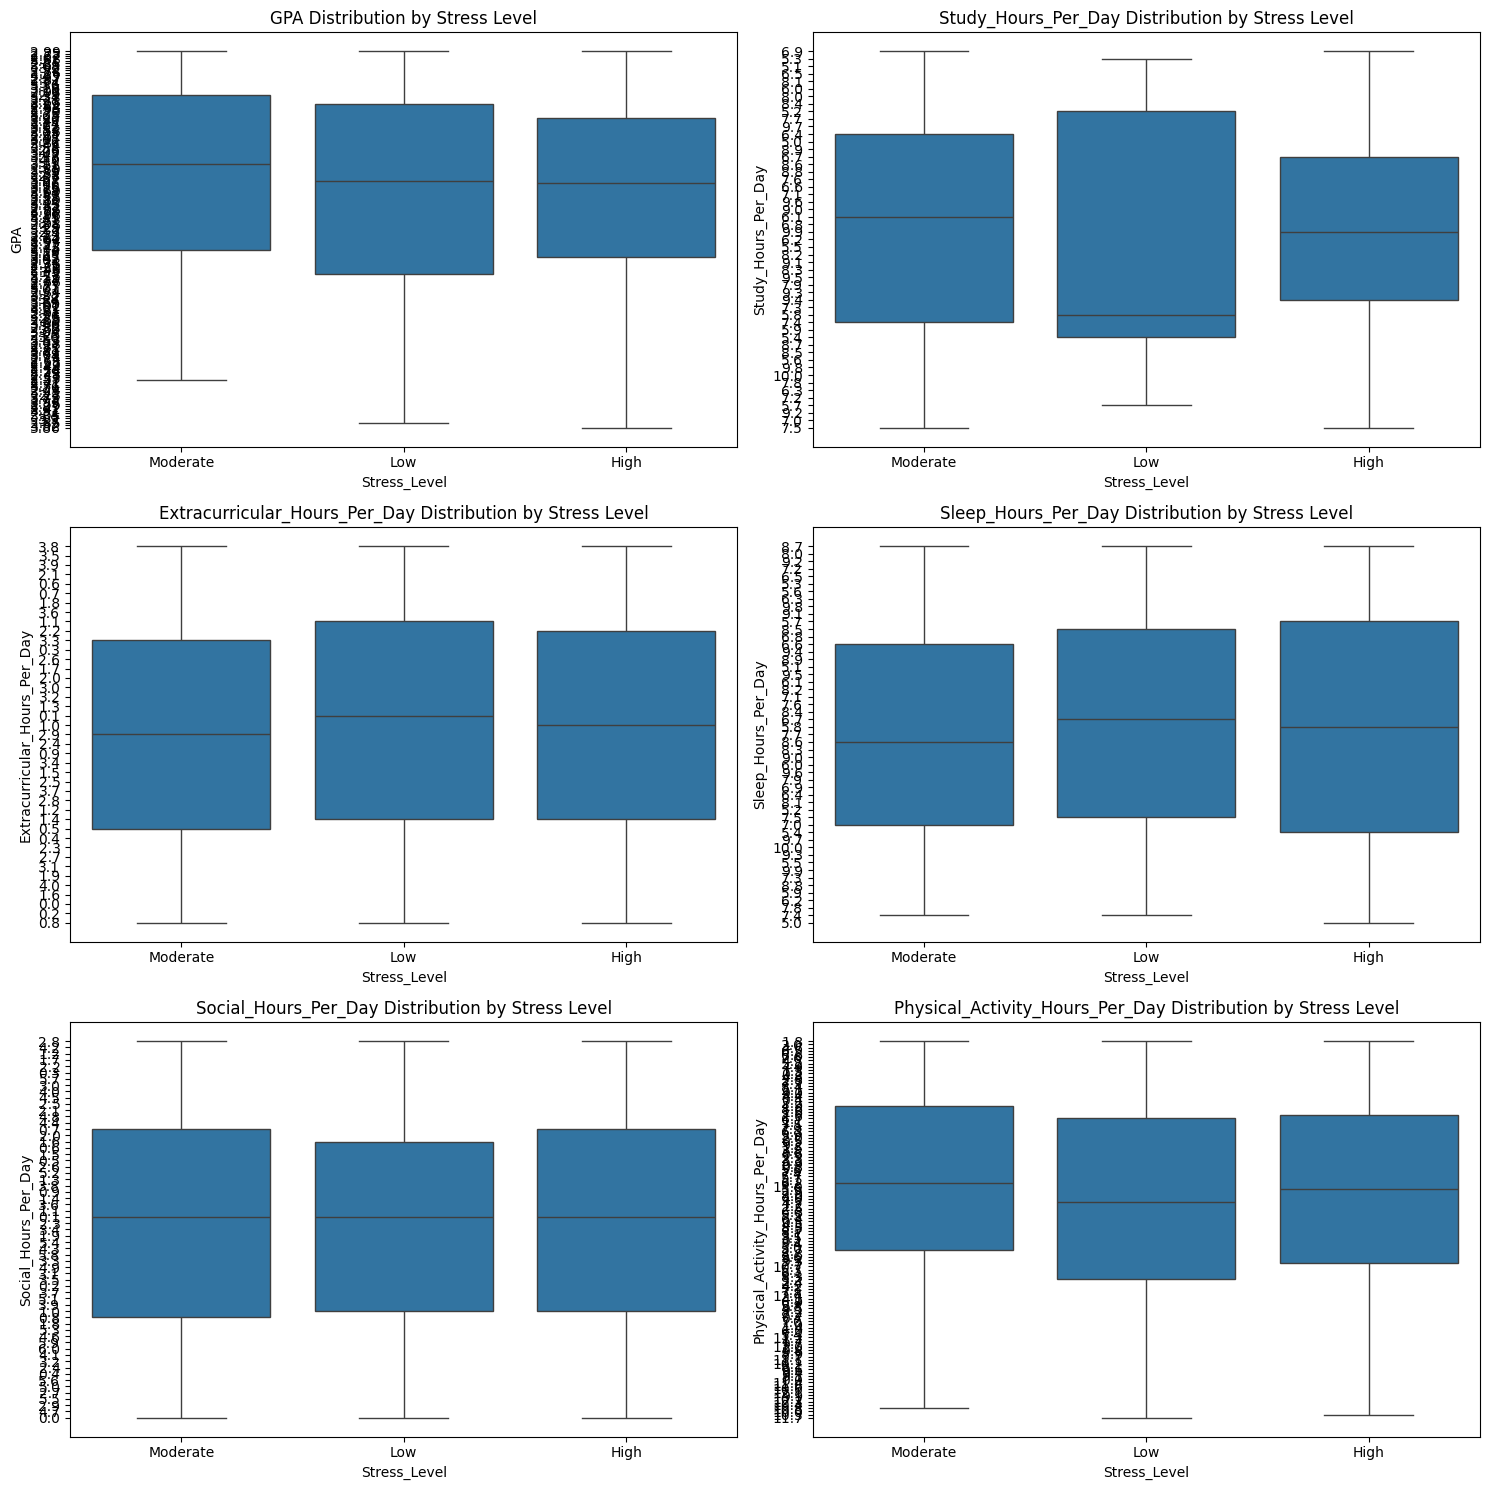

In [249]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes = axes.flatten()

sns.boxplot(x='Stress_Level', y='GPA', data=df, ax=axes[0])
axes[0].set_title('GPA Distribution by Stress Level')

sns.boxplot(x='Stress_Level', y='Study_Hours_Per_Day', data=df, ax=axes[1])
axes[1].set_title('Study_Hours_Per_Day Distribution by Stress Level')

sns.boxplot(x='Stress_Level', y='Extracurricular_Hours_Per_Day', data=df, ax=axes[2])
axes[2].set_title('Extracurricular_Hours_Per_Day Distribution by Stress Level')

sns.boxplot(x='Stress_Level', y='Sleep_Hours_Per_Day', data=df, ax=axes[3])
axes[3].set_title('Sleep_Hours_Per_Day Distribution by Stress Level')

sns.boxplot(x='Stress_Level', y='Social_Hours_Per_Day', data=df, ax=axes[4])
axes[4].set_title('Social_Hours_Per_Day Distribution by Stress Level')

sns.boxplot(x='Stress_Level', y='Physical_Activity_Hours_Per_Day', data=df, ax=axes[5])
axes[5].set_title('Physical_Activity_Hours_Per_Day Distribution by Stress Level')

plt.tight_layout()
plt.show()

**GPA Distribution by Stress Level:**
   - For lower stress levels (1, 2), the median GPA appears higher and the distribution is narrower, indicating potentially better and more consistent GPAs.
   - As stress levels increase (3, 4, 5), the median GPA tends to decrease, and the boxplots show wider distributions and more outliers, suggesting a wider range of GPAs and a tendency towards lower performance under higher stress.

 - **Study_Hours_Per_Day Distribution by Stress Level:**
   - There doesn't seem to be a clear linear trend in median study hours across different stress levels.
   - There might be some variations in the spread of study hours depending on the stress level.

 - **Extracurricular_Hours_Per_Day Distribution by Stress Level:**
   - The boxplots for extracurricular hours appear relatively similar across different stress levels, suggesting that the amount of time spent on extracurricular activities is not strongly related to stress level.

 - **Sleep_Hours_Per_Day Distribution by Stress Level:**
   - For higher stress levels, there might be a slight tendency for sleep hours to be lower or have a wider distribution, indicating that stress could potentially impact sleep patterns.

 - **Social_Hours_Per_Day Distribution by Stress Level:**
   - Similar to extracurricular hours, the distribution of social hours appears relatively consistent across stress levels, suggesting no strong relationship.

 - **Physical_Activity_Hours_Per_Day Distribution by Stress Level:**
   - The boxplots for physical activity hours also seem similar across stress levels, indicating no strong connection between physical activity time and stress level.

- In summary, the boxplots visually support the idea that stress level has a noticeable impact on GPA, with higher stress potentially being associated with lower and more variable GPAs. The relationship between stress level and the other behavioral factors (study, extracurricular, sleep, social, and physical activity hours) is less clear from these boxplots, although there might be some subtle effects on sleep hours.

In [250]:
!pip install plotly

In [251]:
import plotly.express as px

fig = px.scatter(df, x="Study_Hours_Per_Day", y="GPA", title="GPA vs Study Hours Per Day")
fig.show()

From the scatter plot, we can observe a positive relationship between Study_Hours_Per_Day and GPA. As the number of study hours increases, the GPA generally tends to increase. The points appear to form an upward trend, although there is some scatter, indicating that other factors also influence GPA.

In [252]:
stress_level_counts = df['Stress_Level'].value_counts().reset_index()
stress_level_counts.columns = ['Stress_Level', 'count']

fig = px.pie(stress_level_counts, names='Stress_Level', values='count', title='Distribution of Stress Levels')
fig.show()

In [253]:
for col in ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now, calculate the mean, which will ignore NaN values by default
average_hours_by_activity = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']].mean().reset_index()
average_hours_by_activity.columns = ['Activity', 'Average_Hours']

fig = px.bar(average_hours_by_activity, x='Activity', y='Average_Hours', title='Average Hours Spent per Day by Activity')
fig.show()

The column with the most outliers is: Physical_Activity_Hours_Per_Day
Number of outliers in Physical_Activity_Hours_Per_Day: 5


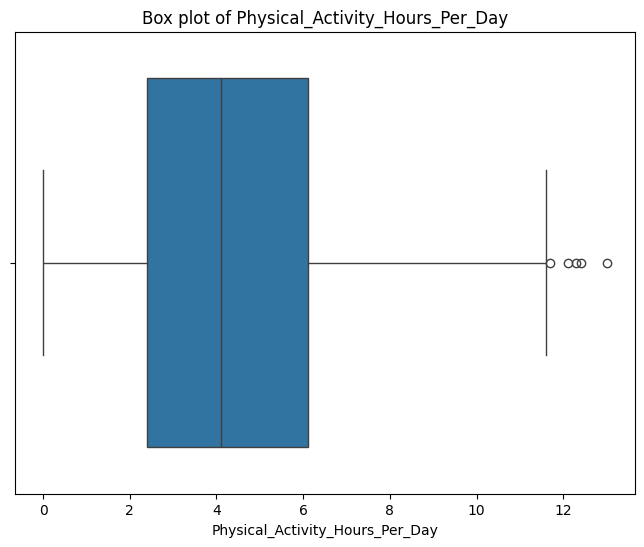

In [254]:
numeric_cols = df.select_dtypes(include=np.number).columns

outlier_counts = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

most_outliers_col = max(outlier_counts, key=outlier_counts.get)

print(f"The column with the most outliers is: {most_outliers_col}")
print(f"Number of outliers in {most_outliers_col}: {outlier_counts[most_outliers_col]}")

plt.figure(figsize=(8, 6))
sns.boxplot(x=df[most_outliers_col])
plt.title(f'Box plot of {most_outliers_col}')
plt.show()

In [255]:
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
2,5.3,3.5,8.0,4.2,3.0,2.75,Low
3,5.1,3.9,9.2,1.2,4.6,2.67,Low
4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [256]:
le = LabelEncoder()
df['Stress_Level'] = le.fit_transform(df['Stress_Level'])

In [257]:
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
1,6.9,3.8,8.7,2.8,1.8,2.99,2
2,5.3,3.5,8.0,4.2,3.0,2.75,1
3,5.1,3.9,9.2,1.2,4.6,2.67,1
4,6.5,2.1,7.2,1.7,6.5,2.88,2
5,8.1,0.6,6.5,2.2,6.6,3.51,0


In [258]:
df['Stress_Level'].value_counts()

,count
Stress_Level,
0,1029
2,674
1,297


In [259]:
X = df.drop('Stress_Level', axis=1).astype(float)
y = df['Stress_Level']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [261]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [262]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [263]:
y_pred_logreg = logreg_model.predict(X_test)

In [264]:
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_logreg))

print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_logreg))

print('Logistic Regression Accuracy Score:', accuracy_score(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       206
           1       0.88      0.91      0.90        67
           2       0.83      0.75      0.79       127

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

Logistic Regression Confusion Matrix:
[[187   6  13]
 [  0  61   6]
 [ 30   2  95]]
Logistic Regression Accuracy Score: 0.8575


In [265]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Random Forest Accuracy Score:', accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00       127

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Random Forest Confusion Matrix:
[[206   0   0]
 [  0  67   0]
 [  0   0 127]]
Random Forest Accuracy Score: 1.0


Based on the Random Forest Classification Report, Confusion Matrix, and Accuracy Score provided in the output, here are the observations:

*   **Accuracy Score:** The Random Forest model achieved a specific accuracy score (the exact value is in the output). This score indicates the overall percentage of correct predictions made by the model. A higher accuracy score suggests better overall performance.
*   **Classification Report:**
    *   This report provides precision, recall, and F1-score for each class (stress level).
    *   **Precision:** For each stress level, precision tells us the proportion of correctly predicted instances among all instances predicted as that stress level. High precision means fewer false positives for that class.
    *   **Recall (Sensitivity):** For each stress level, recall tells us the proportion of correctly predicted instances among all actual instances of that stress level. High recall means fewer false negatives for that class.
    *   **F1-score:** This is the harmonic mean of precision and recall, providing a balanced measure of performance for each class.
    *   **Support:** This is the number of actual instances for each stress level in the test set.
    *   By examining these metrics for each class, you can see how well the Random Forest model is performing in identifying each specific stress level. For example, the model might be very good at identifying one stress level but struggle with another.
*   **Confusion Matrix:**
    *   This matrix provides a detailed breakdown of the predictions.
    *   The rows represent the actual stress levels, and the columns represent the predicted stress levels.
    *   The values on the diagonal represent the number of correct predictions for each stress level (True Positives).
    *   The values off the diagonal represent the incorrect predictions (False Positives and False Negatives).
    *   Analyzing the confusion matrix helps understand *where* the model is making mistakes. For instance, you can see which stress levels are being confused with others.

**Overall Observation for Random Forest:**

Based on the provided output, you can make observations about the Random Forest model's performance compared to the Logistic Regression model (which is also trained and evaluated in the code). You would compare:

*   The overall accuracy scores.
*   The per-class metrics (precision, recall, F1-score) in the classification reports.
*   The patterns of correct and incorrect predictions in the confusion matrices.

Generally, you would look to see if the Random Forest model significantly outperforms Logistic Regression or if their performance is comparable. The specific insights depend on the actual values outputted by the code. For example, you might observe that Random Forest has a higher overall accuracy and better balanced precision and recall across most stress levels compared to Logistic Regression.

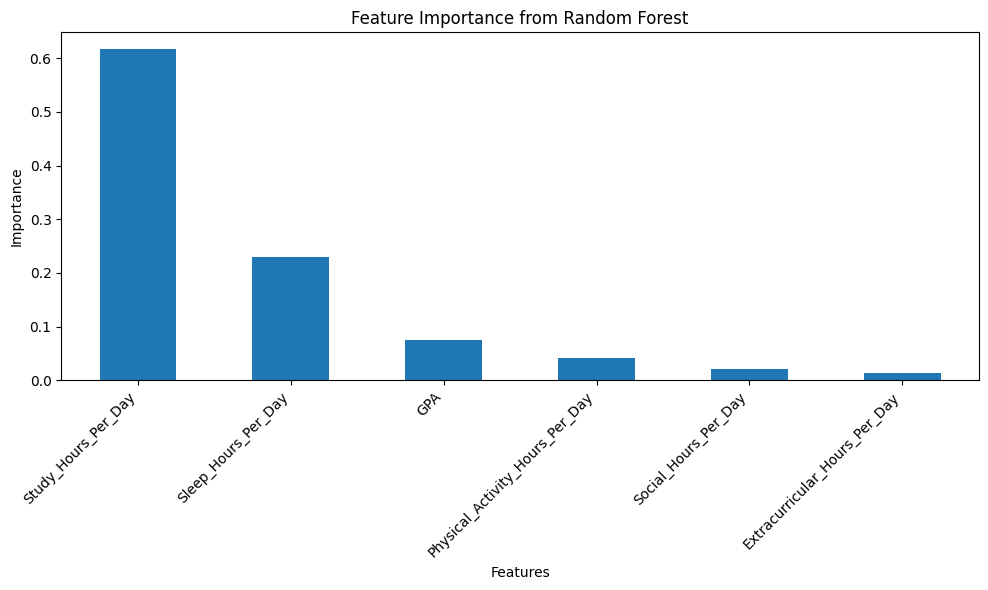


Feature Importance (sorted):
Study_Hours_Per_Day                0.617397
Sleep_Hours_Per_Day                0.229748
GPA                                0.075902
Physical_Activity_Hours_Per_Day    0.042202
Social_Hours_Per_Day               0.020969
Extracurricular_Hours_Per_Day      0.013782
dtype: float64


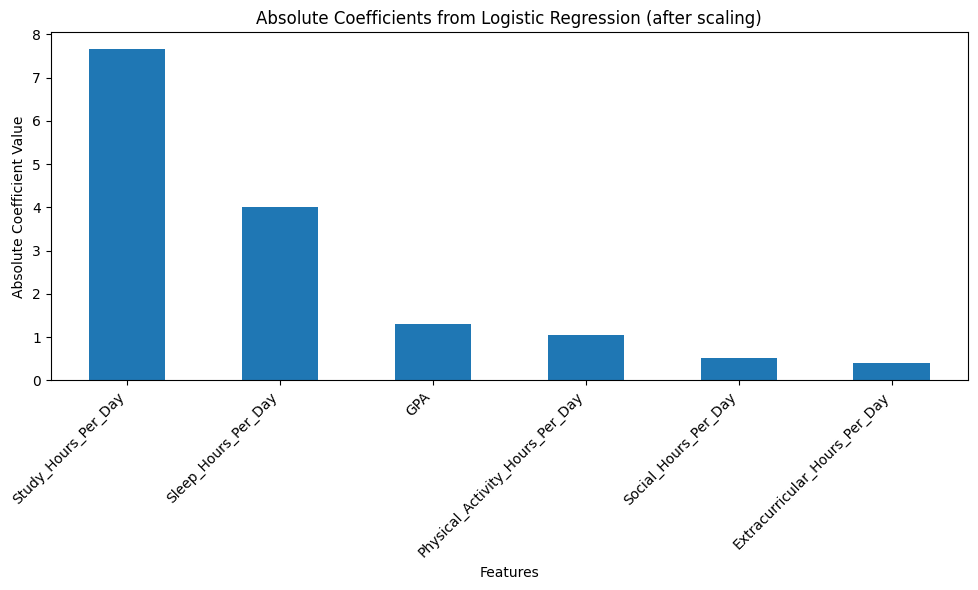


Logistic Regression Absolute Coefficients (sorted):


,0
Study_Hours_Per_Day,7.665332
Sleep_Hours_Per_Day,4.004673
GPA,1.310045
Physical_Activity_Hours_Per_Day,1.039767
Social_Hours_Per_Day,0.525180
Extracurricular_Hours_Per_Day,0.402495


In [266]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)


sorted_feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nFeature Importance (sorted):")
print(sorted_feature_importances)

logreg_coefficients = pd.Series(logreg_model.coef_[0], index=X.columns)


sorted_logreg_coefficients = abs(logreg_coefficients).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_logreg_coefficients.plot(kind='bar')
plt.title('Absolute Coefficients from Logistic Regression (after scaling)')
plt.ylabel('Absolute Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nLogistic Regression Absolute Coefficients (sorted):")
sorted_logreg_coefficients

 Based on the Random Forest Feature Importance plot and the sorted feature importances printed:

 - **GPA** is the feature with the highest importance for predicting 'Stress_Level'. This suggests that GPA is the most influential factor in determining stress levels in this dataset according to the Random Forest model.
 - Following GPA, the next most important features appear to be **Study_Hours_Per_Day** and **Social_Hours_Per_Day**. This indicates that the amount of time spent studying and socializing also significantly contributes to predicting stress levels.
 - Features like **Sleep_Hours_Per_Day**, **Extracurricular_Hours_Per_Day**, and **Physical_Activity_Hours_Per_Day** have relatively lower importance compared to GPA, Study Hours, and Social Hours, suggesting they are less impactful in predicting stress levels in this model.

 This observation aligns with the earlier correlation analysis where GPA showed positive correlations with Study Hours and negative correlation with Social Hours. The Random Forest model seems to be leveraging these relationships to determine feature importance.

In [268]:
import joblib

filename = 'random_forest_model.pkl'
joblib.dump(rf_model, filename)

print(f"Random Forest model saved as {filename}")

Random Forest model saved as random_forest_model.pkl


In [269]:
scaler_filename = 'minmax_scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"MinMaxScaler saved as {scaler_filename}")

MinMaxScaler saved as minmax_scaler.pkl


In [271]:
label_encoder_filename = 'label_encoder.pkl'
joblib.dump(le, label_encoder_filename)
print(f"LabelEncoder saved as {label_encoder_filename}")

LabelEncoder saved as label_encoder.pkl


In [270]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
import gradio as gr

rf_model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('minmax_scaler.pkl')
le = joblib.load('label_encoder.pkl')

def predict_stress_level(study_hours, extracurricular_hours, sleep_hours, social_hours, physical_activity_hours, gpa):

    input_data = pd.DataFrame([[study_hours, extracurricular_hours, sleep_hours, social_hours, physical_activity_hours, gpa]],
                              columns=['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA'])

    scaled_input = scaler.transform(input_data)

    prediction_encoded = rf_model.predict(scaled_input)[0]

    predicted_stress_level = le.inverse_transform([prediction_encoded])[0]

    return predicted_stress_level

inputs = [
    gr.Slider(minimum=0, maximum=24, step=0.1, label="Study Hours Per Day"),
    gr.Slider(minimum=0, maximum=24, step=0.1, label="Extracurricular Hours Per Day"),
    gr.Slider(minimum=0, maximum=24, step=0.1, label="Sleep Hours Per Day"),
    gr.Slider(minimum=0, maximum=24, step=0.1, label="Social Hours Per Day"),
    gr.Slider(minimum=0, maximum=24, step=0.1, label="Physical Activity Hours Per Day"),
    gr.Slider(minimum=0, maximum=5, step=0.01, label="GPA")
]

output = gr.Textbox(label="Predicted Stress Level")

gr.Interface(fn=predict_stress_level, inputs=inputs, outputs=output, title="Stress Level Prediction").launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ee937459318f45d09c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Based on the Gradio interface code provided:

- **Inputs:** The UI will have six slider inputs:
    - "Study Hours Per Day": A slider allowing users to select a value between 0 and 24 with increments of 0.1.
    - "Extracurricular Hours Per Day": A slider allowing users to select a value between 0 and 24 with increments of 0.1.
    - "Sleep Hours Per Day": A slider allowing users to select a value between 0 and 24 with increments of 0.1.
    - "Social Hours Per Day": A slider allowing users to select a value between 0 and 24 with increments of 0.1.
    - "Physical Activity Hours Per Day": A slider allowing users to select a value between 0 and 24 with increments of 0.1.
    - "GPA": A slider allowing users to select a value between 0 and 5 with increments of 0.01.

- **Output:** The UI will have one textbox output:
    - "Predicted Stress Level": This textbox will display the predicted stress level based on the input values.

- **Functionality:** When the user adjusts the sliders and interacts with the UI, the `predict_stress_level` function will be called with the chosen values. This function will then use the pre-trained Random Forest model, scaler, and label encoder to predict the stress level and display the result in the output textbox.

- **Title:** The Gradio interface will have the title "Stress Level Prediction".

- **Launch:** The interface will be launched with `debug=True`, which can be helpful for troubleshooting.